# Calcul scientifique -- TP8 :  Interpolation/ajustement 


L'intensité de la radiation d'une substance radioactive se mesure au moyen de la 'demi-vie' $b$ de la substance.


On sait que  la décroissance de la radioactivité suit une loi :$$\gamma(t) = a e^{-bt}$$  et on a mesuré les radiations suivantes :


|t (années) |0 |0.5|1|1.5|2|2.5|
|---|--- |---|---|---|---|---|
|$\gamma(t)$ |1.000 |0.994|0.990|0.985|0.979|0.977|

|t (années) |3 |3.5|4|4.5|5|5.5|
|---|--- |---|---|---|---|---|
|$\gamma(t)$ |0.972 |0.969|0.967|0.960 |0.956 | 0.952|


L'exercice vise à estimer les valeurs de a et b ou de trouver une fonction qui permet de déterminer $\gamma(t)$ pour toutes les valeurs de t.





##  Interpolation, ajustement 
### Tracé des données

Tracer l'évolution des mesures $\gamma$ en fonction de $t$  comme sur le shéma ci-dessous

Text(0, 0.5, 'Radioactivité')

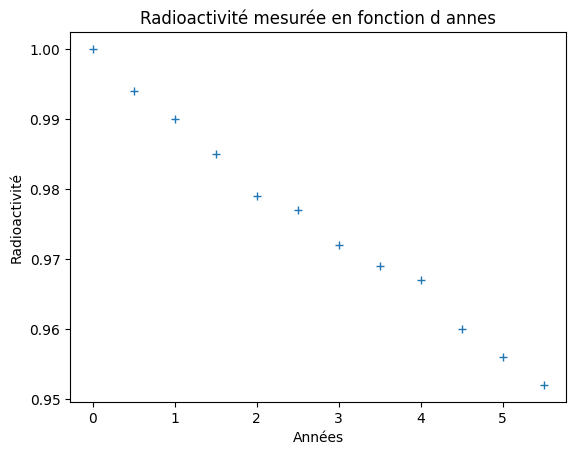

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline  

tab = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
gtab = np.array([1.000,0.994,0.990,0.985,0.979,0.977, 0.972,0.969,0.967,0.960,0.956,0.952])

# à compléter
fig, ax = plt.subplots()
ax.plot(tab, gtab, '+')
ax.set_title('Radioactivité mesurée en fonction d annes')
ax.set_xlabel('Années')
ax.set_ylabel('Radioactivité')

Nous allons désormais étudier des méthodes permettant de trouver les valeurs "optimales" de $a$ et $b$. Par optimales, nous voulons désigner les valeurs qui minimisent la somme des erreurs quadratiques avec les données (c.f. cours).

On vous présente une 1ère méthode qui vous servira de tutoriel. Vous pouvez **faire plusieurs essais pour vérifier que cette 1ère approche fonctionne correctement.**

### Première méthode.

Nous allons calculer la somme des erreurs au carré en fonction de $a$ et $b$  : $$ S(a,b) = \sum_t(\gamma_t-ae^{-bt})^2,$$ et rechercher des valeurs minimales de cette erreur. 

Cette erreur sera minimale pour les valeurs de $a$ et $b$ pour lesquelles $\frac{\partial S(a,b)}{\partial a} = 0$ et $\frac{\partial S(a,b)}{\partial b} = 0$.

On va commencer par définir avec `sympy` l'expression correspondant à $$ (\gamma_t-ae^{-bt})^2$$

puis on va déduire grâce à la dérivation de sympy les deux expressions suivantes : $$f_1(a,b)=\frac{\partial\ (\gamma_t-ae^{-bt})^2}{\partial a},$$ et $$f_2(a,b)=\frac{\partial\ (\gamma_t-ae^{-bt})^2}{\partial b}.$$

Ensite, on convertit ces deux expressions en fonctions `python` en utilisant  sympy.lambdify.

Ainsi, on obtient deux fonctions $f_1$ et $f_2$ qui ont chacune 4 paramètres: $a,b,t,g$

In [3]:
import  sympy
# définition des symboles (il est conseillé de ne pas leur donner le même nom que les variables)
t_s,a_s,b_s,gamma_s = sympy.symbols('t,a,b,gamma')
# définition de l'expression
err_s = (a_s*sympy.exp(-b_s*t_s)-gamma_s)**2
# calcul des dérivées partielles
d1=sympy.diff(err_s,a_s)
d2=sympy.diff(err_s,b_s)
print("err(a,b)= ", err_s)
print("d err(a,b)/da =",d1)
print("d err(a,b)/db =",d2)

err(a,b)=  (a*exp(-b*t) - gamma)**2
d err(a,b)/da = 2*(a*exp(-b*t) - gamma)*exp(-b*t)
d err(a,b)/db = -2*a*t*(a*exp(-b*t) - gamma)*exp(-b*t)


En utilisant les fonctions de la question précédente et *np.sum*, on va calculer les dérivées partielles de $S$ par rapport à $a$ et $b$. 

On construit ensuite une fonction $F$ qui retourne $$F(a,b)=\left[\frac{\partial S(a,b)}{\partial a},\frac{\partial S(a,b)}{\partial b}\right] .$$

Pour cette fonction on prend t=tab et g=gtab. On la code avec un seul argument correspondant au tableau numpy $[a,b]$.
Pour vérifier que cette fonction donne les bons résultats, on va calculer $F([0,0])$.


In [4]:
# on transforme les expressions sympy en fonctions python
f1 = sympy.lambdify([a_s,b_s,t_s,gamma_s], sympy.diff(err_s,a_s))
f2 = sympy.lambdify([a_s,b_s,t_s,gamma_s], sympy.diff(err_s,b_s))

# on peut ensuite calculer les deux sommes qui constituent la fonction F
def da(a,b,t,y):
    return np.sum(f1(a,b,t,y))

def db(a,b,t,y):
    return np.sum(f2(a,b,t,y))

# attention F doit être une fonction avec un seul paramètre qui est un tableau (ici p) contenant a et b à l'appel
def F(p):
    return [da(p[0],p[1],tab,gtab), db(p[0],p[1],tab,gtab)]

print("F([0,0])=",F([0,0]))



F([0,0])= [-23.401999999999997, 0.0]


Au moyen de la fonction `scipy.optimize.fsolve` vue en cours, on va estimer les valeurs de $a$ et $b$ annulant la dérivée. 

Pour les afficher, on prendra comme tablau initial  p0= np.array([ 1 , 0].

In [5]:
# defintion du tableau des conditions initiales:
p0= np.array([1 , 0])
# solve
sol=scipy.optimize.fsolve(F,p0)
# on récupère les valeurs de a et b
print("[a,b]=",sol)
a,b=sol


[a,b]= [0.99843145 0.00864506]


***Vérification graphique***

Pour cela, on va tracer la courbe $\gamma(t) = a e^{-bt},$ avec les valeurs estimées de $a$ $b$ en superposant cette courbe sur les points mesurés.


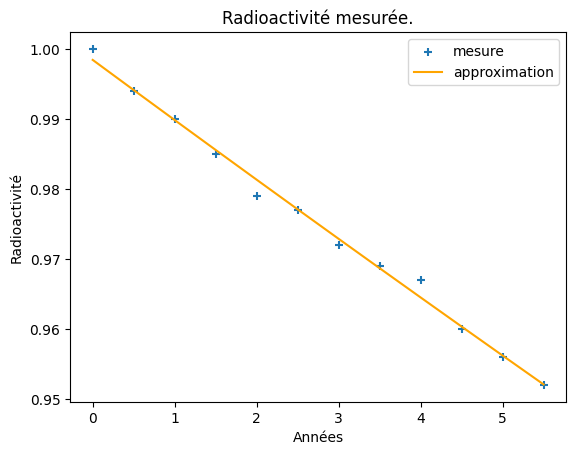

In [6]:
# pour le dessin, on définit f
# (on pourrait aussi utiliser subs avec l'expression sympy, lambda  etc...)
# Ex: f = lambda t,a,b:a*np.exp(-b*t)

def f(t,a,b):
    return (a*np.exp(-b*t))

# à compléter
fig, ax = plt.subplots()
ax.scatter(tab, gtab, marker='+', label='mesure')
ax.plot(tab, f(tab,a,b), color='orange', label='approximation')
ax.set_title('Radioactivité mesurée.')
ax.set_xlabel('Années')
ax.set_ylabel('Radioactivité')
ax.legend()
# plt.plot()
# plt.show()

In [7]:
# Il faut définir une fonction qui a la forme de ce que l'on recherche
# la variable qui n'est pas dans les paramètres qu'on cherche doit être ennpremier argument

# à compléter
def f(t,a,b):
    return (a*np.exp(-b*t))

#  valeurs initiales :
a0,b0 = (0.5,0.5)
# sp.optimize.curve_fit renvoie un tuple dont le premier élément est le tuple des paramètres recherchés
coeffs, fiterr = scipy.optimize.curve_fit(f, tab, gtab, (a0,b0))

print("[a,b,]", coeffs)

[a,b,] [0.99843145 0.00864506]


***Vérification graphique***

A nouveau, tracer la fonction donnant l'évolution de la radioactivité avec les paramètres obtenus, en la superposant aux valeurs mesurées.

In [8]:
# à compléter

Calculer les résidus $r_i$, leur somme et leur moyenne et l'écart-type (entre mesures et valeurs estimées)

In [9]:
# à compléter
residu = gtab- f(tab,coeffs[0],coeffs[1])

print("residu :",residu)
s = np.sum(residu)
moy = np.mean(residu)
ecart = np.std(residu)
print(f"somme = {s} \n moyenne = {moy} \n écart-type = {ecart}")

residu : [ 1.56854604e-03 -1.25016373e-04  1.62846672e-04 -5.67784707e-04
 -2.31683074e-03 -8.42120002e-05 -8.69849405e-04  3.26335789e-04
  2.50442198e-03 -3.35512754e-04 -1.93390699e-04 -6.91344575e-05]
somme = 4.1935400529879985e-07 
 moyenne = 3.494616710823332e-08 
 écart-type = 0.0011361364161152849


Là on pouvait avoir des résidus "négatifs" et dont les résultats pouvaient se compenser.
Reprendre les formules en ajoutant des valeurs absolues.


In [10]:
# à compléter
residu_postivie = np.abs(residu)
print("residu positif =",residu_postivie)

residu positif = [1.56854604e-03 1.25016373e-04 1.62846672e-04 5.67784707e-04
 2.31683074e-03 8.42120002e-05 8.69849405e-04 3.26335789e-04
 2.50442198e-03 3.35512754e-04 1.93390699e-04 6.91344575e-05]


Calculer une autre moyenne de résidus (écart entre modèle et données) au moyen de la formule $rm=\frac{\sqrt{\sum(f(t)-t_i)^2}}{N}$.

Il s'agit de la moyenne des écarts au carré entre le modèle et les données, où $N$ est le nombre de points.

In [11]:
# à compléter

rm = np.sqrt(np.sum(residu**2)) / len(residu)
rm

0.0003279743329952969

### interpolation

On cherche maintenant à définir une fonction (dont on n'aura pas l'expression) qui permettra d'interpoler (de trouver une valeur approchée) des points situés "entre les mesures". Pour cela on utilisera 
 scipy.interpolate.CubicSpline
 
Faire ensuite un shéma avec les valeurs mesurées, la fonction déterminer avec ajustement et celle avec interpolation.

In [27]:
import scipy.interpolate

# il suffit d'utiliser interpolate.CubicSpline avec les deux tableaux qui correspondent le premier aux abscisses, le second aux ordonnéesc

# à compléter
r = scipy.interpolate.CubicSpline(tab,gtab)


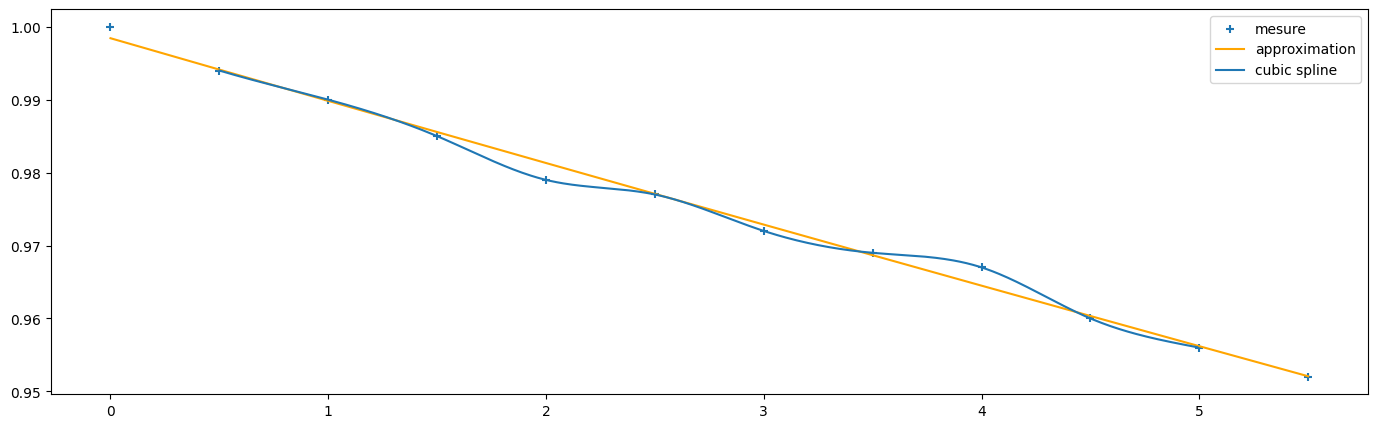

In [29]:


fi,ax=plt.subplots(figsize=(17,5))
# pour afficher la courbe du cubicspline, il faut prendre suffisamment de points
# si on travaille avec tab on aura une ligne brisée

# à compléter
ax.scatter(tab,gtab, marker='+',label='mesure')
ax.plot(tab, f(tab, coeffs[0], coeffs[1]), 'orange', label='approximation')
t = np.arange(0.5, 5.0 ,  0.01)
ax.plot(t, r(t), label='cubic spline')
ax.legend()





## Exercice de révision  (avec interpolation et ajustement)



On travaille avec deux tableaux : le premier appelé ref comporte 100 valeurs entre -1 et 2 (non réparties régulièrement).

Le second tableau se compose de 20 séries de 100 valeurs qui correspondent  20 séries de mesures correspondants aux valeurs de ref.

In [14]:
import numpy as np
import matplotlib.pyplot as plt



ref =np.array([-0.99      , -0.96769697, -0.93139394, -0.90109091, -0.87278788,
       -0.82848485, -0.79818182, -0.77987879, -0.73757576, -0.72127273,
       -0.6949697 , -0.65666667, -0.63636364, -0.59206061, -0.56575758,
       -0.53745455, -0.49715152, -0.46884848, -0.44654545, -0.41424242,
       -0.38193939, -0.36163636, -0.31333333, -0.2870303 , -0.26472727,
       -0.22442424, -0.20212121, -0.17781818, -0.13151515, -0.10921212,
       -0.08290909, -0.04260606, -0.01830303,  0.        ,  0.03630303,
        0.06260606,  0.10490909,  0.13121212,  0.16551515,  0.19581818,
        0.22012121,  0.25242424,  0.29072727,  0.3090303 ,  0.33533333,
        0.37163636,  0.40593939,  0.44424242,  0.46054545,  0.50084848,
        0.53315152,  0.56145455,  0.58575758,  0.60606061,  0.65636364,
        0.68066667,  0.7149697 ,  0.73727273,  0.76557576,  0.78987879,
        0.83218182,  0.86848485,  0.88678788,  0.91709091,  0.94339394,
        0.97969697,  1.016     ,  1.04630303,  1.06460606,  1.09890909,
        1.12921212,  1.15551515,  1.19781818,  1.22412121,  1.25442424,
        1.28872727,  1.3050303 ,  1.34533333,  1.37163636,  1.40793939,
        1.43824242,  1.45654545,  1.48484848,  1.52715152,  1.55345455,
        1.58375758,  1.61606061,  1.63636364,  1.67666667,  1.7109697 ,
        1.73527273,  1.76757576,  1.80787879,  1.83018182,  1.86648485,
        1.88278788,  1.90909091,  1.94139394,  1.98969697,  2.        ])



tab20=np.array([np.array([-7.03952400e-01, -7.59255455e-01, -6.33995770e-01, -5.97061662e-01,
        -5.87879628e-01, -4.40772662e-01, -5.26606616e-01, -3.61125107e-01,
        -4.13878881e-01, -3.01707792e-01, -3.11805248e-01, -2.79605866e-01,
        -2.81943651e-01, -8.63966766e-02, -5.88614656e-02, -1.70516343e-01,
        -1.38804843e-01,  7.28446756e-04, -8.05637102e-02,  1.86002161e-02,
         3.20420028e-02, -5.86581347e-03,  4.42962963e-02, -2.27773405e-02,
         7.15504409e-02,  1.84355960e-01,  1.23020341e-01,  8.69589809e-02,
         1.05652726e-01,  2.01144210e-01,  1.73756574e-01,  1.74419516e-01,
         1.46750238e-02,  1.60605070e-01,  1.60101651e-01,  2.24254792e-02,
         4.87875903e-02,  9.08028828e-02,  1.69424591e-01,  1.41358275e-02,
         2.09553869e-02,  8.73264229e-02, -2.66059393e-02,  1.04881081e-01,
         5.74944267e-02, -2.68178385e-02, -1.03740630e-01, -8.52445784e-02,
        -3.01830303e-02, -1.34898026e-01, -3.57791134e-02, -1.18061615e-02,
        -7.02789028e-02, -3.33137950e-02, -6.21813534e-02, -1.64476260e-01,
        -9.36393813e-02, -1.16558978e-02, -1.03010133e-01, -1.36626900e-01,
        -1.95846985e-01, -2.38181829e-02, -1.60763953e-01, -9.48404477e-02,
        -2.87605533e-02, -1.58902620e-01, -9.00000000e-03, -2.98078553e-03,
        -9.83806436e-02, -1.05974021e-01, -8.71191099e-02, -1.08359991e-02,
        -3.61656863e-02,  7.84456423e-02,  9.44444578e-02,  6.35729577e-02,
         9.59194457e-02,  3.71841689e-02,  9.30505812e-02,  1.08592954e-01,
         2.54506612e-01,  3.12721476e-01,  3.40584167e-01,  3.72684987e-01,
         4.34877223e-01,  4.55786908e-01,  3.64112391e-01,  5.20586026e-01,
         5.78245102e-01,  7.34118720e-01,  7.58707850e-01,  8.36309393e-01,
         8.65236988e-01,  1.07963940e+00,  1.12125821e+00,  1.07394596e+00,
         1.27055124e+00,  1.43512360e+00,  1.31800552e+00,  1.72544228e+00]),
 np.array([-0.8239524 , -0.87925546, -0.68399577, -0.70706166, -0.53787963,
        -0.45077266, -0.55660662, -0.35112511, -0.33387888, -0.29170779,
        -0.23180525, -0.24960587, -0.20194365, -0.22639668, -0.16886147,
        -0.11051634, -0.11880484, -0.06927155, -0.09056371, -0.09139978,
        -0.077958  ,  0.01413419,  0.0042963 ,  0.07722266,  0.17155044,
         0.08435596,  0.02302034,  0.05695898,  0.08565273,  0.11114421,
         0.16375657,  0.01441952,  0.15467502,  0.04060507,  0.18010165,
         0.17242548,  0.18878759,  0.09080288,  0.00942459,  0.10413583,
         0.12095539,  0.13732642,  0.09339406, -0.00511892,  0.05749443,
        -0.02681784,  0.02625937, -0.07524458, -0.09018303, -0.04489803,
        -0.06577911, -0.04180616, -0.1002789 , -0.0433138 , -0.03218135,
        -0.09447626, -0.07363938, -0.1716559 , -0.17301013, -0.1366269 ,
        -0.02584698, -0.07381818, -0.12076395, -0.05484045, -0.16876055,
        -0.09890262, -0.129     , -0.01298079, -0.07838064, -0.15597402,
         0.02288089, -0.110836  , -0.11616569, -0.08155436,  0.04444446,
         0.04357296,  0.02591945,  0.15718417,  0.05305058,  0.22859295,
         0.29450661,  0.23272148,  0.28058417,  0.39268499,  0.37487722,
         0.43578691,  0.46411239,  0.60058603,  0.6682451 ,  0.73411872,
         0.73870785,  0.82630939,  0.87523699,  0.9696394 ,  1.10125821,
         1.09394596,  1.22055124,  1.3351236 ,  1.36800552,  1.75544228]),
 np.array([-7.13952400e-01, -8.49255455e-01, -5.73995770e-01, -7.67061662e-01,
        -4.77879628e-01, -5.60772662e-01, -5.16606616e-01, -4.01125107e-01,
        -2.83878881e-01, -3.81707792e-01, -3.31805248e-01, -2.19605866e-01,
        -3.01943651e-01, -1.26396677e-01, -3.88614656e-02, -5.16343381e-04,
        -1.88048426e-02, -8.92715532e-02, -1.05637102e-02,  5.86002161e-02,
        -6.79579972e-02, -5.58658135e-02,  1.42962963e-02, -2.77734048e-03,
         8.15504409e-02,  2.43559596e-02,  1.93020341e-01,  5.69589809e-02,
         1.25652726e-01,  4.11442096e-02,  1.37565740e-02,  1.84419516e-01,
         4.67502381e-03, -9.39492976e-03,  5.01016511e-02,  1.32425479e-01,
        -1.21240968e-03,  6.08028828e-02, -2.05754092e-02,  1.44135828e-01,
         1.50955387e-01,  4.73264229e-02,  3.33940607e-02, -5.11891885e-03,
        -2.25055733e-02,  8.31821615e-02, -3.74063030e-03, -5.24457835e-03,
        -3.01830303e-02, -8.48980259e-02, -8.57791134e-02,  2.81938385e-02,
        -6.02789028e-02, -7.33137950e-02, -7.21813534e-02,  5.52374000e-03,
        -1.53639381e-01, -3.16558978e-02, -1.30101332e-02, -1.26626900e-01,
        -2.05846985e-01, -2.03818183e-01, -3.07639532e-02, -2.14840448e-01,
        -1.88760553e-01, -1.78902620e-01,  1.00000000e-03, -3.29807855e-02,
        -8.38064364e-03, -9.59740211e-02,  2.28808901e-02, -4.08359991e-02,
        -2.61656863e-02,  7.84456423e-02, -5.55555422e-02,  1.35729577e-02,
         9.59194457e-02,  8.71841689e-02,  1.13050581e-01,  1.08592954e-01,
         2.14506612e-01,  1.52721476e-01,  2.80584167e-01,  3.62684987e-01,
         3.64877223e-01,  4.55786908e-01,  4.64112391e-01,  4.60586026e-01,
         4.98245102e-01,  6.34118720e-01,  7.98707850e-01,  9.56309393e-01,
         9.55236988e-01,  1.09963940e+00,  1.10125821e+00,  1.22394596e+00,
         1.19055124e+00,  1.35512360e+00,  1.32800552e+00,  1.63544228e+00]),
 np.array([-7.93952400e-01, -8.19255455e-01, -6.73995770e-01, -6.47061662e-01,
        -5.57879628e-01, -4.90772662e-01, -3.66606616e-01, -5.01125107e-01,
        -3.73878881e-01, -2.41707792e-01, -1.51805248e-01, -2.49605866e-01,
        -2.81943651e-01, -1.46396677e-01, -9.88614656e-02, -1.20516343e-01,
        -8.80484262e-03,  6.07284468e-02,  9.43628976e-03, -5.13997839e-02,
         1.20420028e-02,  1.24134187e-01,  1.42962963e-02, -3.27773405e-02,
         1.41550441e-01,  8.43559596e-02,  9.30203412e-02,  1.26958981e-01,
         1.45652726e-01,  1.61144210e-01,  2.37565740e-02,  3.44195161e-02,
         1.04675024e-01,  1.10605070e-01,  4.01016511e-02,  1.62425479e-01,
         1.88787590e-01,  6.08028828e-02, -5.75409234e-04,  1.44135828e-01,
         1.09553869e-02, -2.26735771e-02,  6.33940607e-02,  6.48810812e-02,
        -4.25055733e-02, -6.81783853e-03,  6.62593697e-02, -4.52445784e-02,
        -8.01830303e-02,  2.51019741e-02, -6.57791134e-02,  1.81938385e-02,
        -5.02789028e-02,  1.66862050e-02, -8.21813534e-02, -2.44762600e-02,
        -9.36393813e-02, -1.51655898e-01, -1.53010133e-01, -5.66268996e-02,
        -1.15846985e-01, -1.73818183e-01, -4.07639532e-02, -1.74840448e-01,
        -1.18760553e-01, -9.89026202e-02, -4.90000000e-02, -1.62980786e-01,
        -9.83806436e-02, -1.65974021e-01, -5.71191099e-02, -1.20835999e-01,
        -6.16568629e-03, -8.15543577e-02, -3.55555422e-02,  3.35729577e-02,
         1.05919446e-01,  1.07184169e-01,  1.43050581e-01,  4.85929543e-02,
         2.14506612e-01,  2.52721476e-01,  2.50584167e-01,  2.82684987e-01,
         4.64877223e-01,  5.25786908e-01,  4.34112391e-01,  5.10586026e-01,
         5.08245102e-01,  6.34118720e-01,  8.88707850e-01,  9.06309393e-01,
         7.95236988e-01,  1.08963940e+00,  1.02125821e+00,  1.13394596e+00,
         1.29055124e+00,  1.39512360e+00,  1.48800552e+00,  1.62544228e+00]),
 np.array([-0.8139524 , -0.68925546, -0.66399577, -0.75706166, -0.55787963,
        -0.45077266, -0.39660662, -0.39112511, -0.29387888, -0.31170779,
        -0.21180525, -0.26960587, -0.26194365, -0.18639668, -0.09886147,
        -0.03051634, -0.05880484, -0.00927155, -0.04056371,  0.08860022,
         0.082042  ,  0.03413419,  0.1242963 ,  0.04722266,  0.12155044,
         0.02435596, -0.00697966,  0.13695898,  0.01565273,  0.10114421,
         0.06375657,  0.02441952,  0.11467502,  0.16060507,  0.03010165,
         0.00242548,  0.13878759,  0.08080288,  0.12942459,  0.04413583,
         0.07095539, -0.05267358,  0.10339406, -0.07511892, -0.01250557,
         0.03318216,  0.06625937,  0.07475542, -0.08018303,  0.05510197,
        -0.12577911, -0.06180616, -0.1602789 , -0.0933138 , -0.09218135,
        -0.15447626, -0.08363938, -0.0716559 , -0.13301013, -0.1766269 ,
        -0.20584698, -0.02381818, -0.14076395, -0.20484045, -0.18876055,
        -0.07890262, -0.099     , -0.05298079, -0.08838064, -0.11597402,
        -0.10711911, -0.040836  , -0.02616569,  0.03844564, -0.01555554,
        -0.04642704,  0.00591945,  0.12718417,  0.10305058,  0.08859295,
         0.29450661,  0.24272148,  0.39058417,  0.39268499,  0.42487722,
         0.49578691,  0.38411239,  0.46058603,  0.5582451 ,  0.68411872,
         0.70870785,  0.79630939,  0.95523699,  1.1496394 ,  1.22125821,
         1.26394596,  1.27055124,  1.3751236 ,  1.37800552,  1.73544228]),
 np.array([-8.53952400e-01, -8.59255455e-01, -7.13995770e-01, -6.97061662e-01,
        -6.07879628e-01, -4.20772662e-01, -4.26606616e-01, -3.91125107e-01,
        -3.63878881e-01, -4.21707792e-01, -1.91805248e-01, -3.49605866e-01,
        -1.01943651e-01, -7.63966766e-02, -1.88861466e-01, -5.16343381e-04,
        -8.80484262e-03, -1.09271553e-01,  5.94362898e-02,  8.60021612e-03,
        -7.79579972e-02, -5.86581347e-03, -1.57037037e-02,  2.72226595e-02,
         1.01550441e-01, -1.56440404e-02,  1.93020341e-01,  2.69589809e-02,
         1.75652726e-01,  1.11144210e-01,  6.37565740e-02,  1.84419516e-01,
         1.74675024e-01,  1.30605070e-01,  1.70101651e-01,  1.42425479e-01,
         4.87875903e-02,  1.70802883e-01,  1.69424591e-01,  1.04135828e-01,
        -9.04461312e-03, -6.26735771e-02,  5.33940607e-02,  3.48810812e-02,
         6.74944267e-02, -8.68178385e-02,  6.62593697e-02,  8.47554216e-02,
        -3.01830303e-02,  5.51019741e-02,  2.42208866e-02, -5.18061615e-02,
        -6.02789028e-02, -1.33137950e-02, -7.21813534e-02, -4.44762600e-02,
        -1.43639381e-01, -1.81655898e-01, -1.93010133e-01, -1.76626900e-01,
        -1.05846985e-01, -1.83818183e-01, -1.30763953e-01, -2.48404477e-02,
        -1.18760553e-01, -3.89026202e-02,  1.00000000e-03, -6.29807855e-02,
        -9.83806436e-02, -6.59740211e-02, -5.71191099e-02,  2.91640009e-02,
        -6.61656863e-02, -2.15543577e-02, -4.55555422e-02, -3.64270423e-02,
         1.45919446e-01,  1.71841689e-02,  1.53050581e-01,  3.85929543e-02,
         2.94506612e-01,  2.72721476e-01,  3.50584167e-01,  4.12684987e-01,
         2.74877223e-01,  3.75786908e-01,  4.04112391e-01,  5.60586026e-01,
         6.08245102e-01,  6.44118720e-01,  8.08707850e-01,  8.26309393e-01,
         8.55236988e-01,  9.79639398e-01,  1.08125821e+00,  1.15394596e+00,
         1.25055124e+00,  1.33512360e+00,  1.49800552e+00,  1.56544228e+00]),
 np.array([-0.7939524 , -0.83925546, -0.66399577, -0.70706166, -0.60787963,
        -0.60077266, -0.54660662, -0.42112511, -0.31387888, -0.33170779,
        -0.17180525, -0.26960587, -0.12194365, -0.10639668, -0.18886147,
        -0.17051634, -0.09880484,  0.03072845, -0.08056371, -0.05139978,
        -0.077958  ,  0.04413419, -0.0557037 ,  0.01722266,  0.09155044,
         0.12435596,  0.11302034,  0.09695898,  0.01565273,  0.09114421,
         0.09375657,  0.02441952,  0.18467502,  0.02060507,  0.16010165,
         0.07242548,  0.04878759,  0.17080288,  0.14942459,  0.00413583,
         0.12095539,  0.03732642,  0.03339406, -0.07511892, -0.06250557,
        -0.05681784,  0.08625937,  0.02475542, -0.04018303,  0.03510197,
        -0.14577911, -0.02180616,  0.0097211 , -0.0333138 , -0.01218135,
        -0.03447626, -0.02363938, -0.0416559 , -0.06301013, -0.0166269 ,
        -0.03584698, -0.05381818, -0.05076395, -0.07484045, -0.04876055,
        -0.19890262, -0.079     , -0.08298079, -0.01838064, -0.06597402,
        -0.13711911, -0.040836  , -0.04616569, -0.01155436, -0.00555554,
         0.09357296,  0.11591945,  0.17718417,  0.10305058,  0.11859295,
         0.14450661,  0.29272148,  0.26058417,  0.39268499,  0.39487722,
         0.46578691,  0.33411239,  0.54058603,  0.5682451 ,  0.70411872,
         0.77870785,  0.96630939,  0.79523699,  1.0896394 ,  1.10125821,
         1.10394596,  1.34055124,  1.3551236 ,  1.46800552,  1.74544228]),
 np.array([-7.23952400e-01, -7.79255455e-01, -6.53995770e-01, -5.97061662e-01,
        -6.47879628e-01, -5.50772662e-01, -5.36606616e-01, -4.31125107e-01,
        -3.53878881e-01, -3.01707792e-01, -2.91805248e-01, -1.49605866e-01,
        -1.31943651e-01, -1.06396677e-01, -1.98861466e-01, -1.00516343e-01,
        -1.88048426e-02, -6.92715532e-02, -1.10563710e-01,  3.86002161e-02,
         2.20420028e-02,  1.24134187e-01,  7.42962963e-02,  1.37222660e-01,
         1.71550441e-01,  1.34355960e-01,  6.30203412e-02,  6.95898089e-03,
         9.56527256e-02,  1.01144210e-01,  5.37565740e-02,  4.41951608e-03,
         1.04675024e-01,  6.05070240e-04,  1.50101651e-01,  9.24254792e-02,
        -1.21240968e-03,  1.10802883e-01,  9.42459077e-03, -3.58641725e-02,
         4.09553869e-02,  1.73264229e-02,  4.33940607e-02,  6.48810812e-02,
         1.74944267e-02,  6.31821615e-02, -3.74063030e-03, -8.52445784e-02,
        -1.10183030e-01, -4.48980259e-02,  4.22088655e-03, -1.01806162e-01,
         9.72109724e-03, -1.23313795e-01,  7.81864659e-03, -8.44762600e-02,
        -1.13639381e-01, -8.16558978e-02, -1.03010133e-01, -2.06626900e-01,
        -2.15846985e-01, -1.63818183e-01, -1.07639532e-02, -5.48404477e-02,
        -1.88760553e-01, -7.89026202e-02, -1.69000000e-01, -9.29807855e-02,
        -8.83806436e-02, -1.35974021e-01, -4.71191099e-02, -4.08359991e-02,
        -7.61656863e-02,  7.84456423e-02,  1.04444458e-01,  1.35729577e-02,
         5.59194457e-02,  1.17184169e-01,  8.30505812e-02,  1.88592954e-01,
         3.14506612e-01,  2.72721476e-01,  2.00584167e-01,  3.32684987e-01,
         3.54877223e-01,  3.65786908e-01,  4.24112391e-01,  5.00586026e-01,
         6.48245102e-01,  7.04118720e-01,  7.78707850e-01,  9.46309393e-01,
         9.15236988e-01,  1.13963940e+00,  1.09125821e+00,  1.18394596e+00,
         1.18055124e+00,  1.41512360e+00,  1.49800552e+00,  1.62544228e+00]),
 np.array([-6.83952400e-01, -8.09255455e-01, -7.13995770e-01, -6.97061662e-01,
        -5.77879628e-01, -5.00772662e-01, -3.86606616e-01, -5.11125107e-01,
        -2.83878881e-01, -3.21707792e-01, -2.51805248e-01, -3.29605866e-01,
        -2.51943651e-01, -2.66396677e-01, -1.28861466e-01, -1.70516343e-01,
         1.19515738e-03, -9.27155324e-03, -6.05637102e-02,  2.86002161e-02,
         1.22042003e-01,  1.34134187e-01,  7.42962963e-02,  4.72226595e-02,
         4.15504409e-02,  2.43559596e-02,  1.30203412e-02,  1.46958981e-01,
         1.35652726e-01,  2.01144210e-01,  1.93756574e-01,  4.44195161e-02,
         1.34675024e-01,  1.60605070e-01,  1.70101651e-01,  8.24254792e-02,
         9.87875903e-02, -9.19711718e-03,  1.59424591e-01, -1.58641725e-02,
         9.55386881e-04, -3.26735771e-02,  3.39406070e-03,  7.48810812e-02,
        -7.25055733e-02,  4.31821615e-02, -5.37406303e-02,  2.47554216e-02,
        -5.01830303e-02, -6.48980259e-02, -1.35779113e-01, -1.80616154e-03,
        -8.02789028e-02, -3.33137950e-02, -6.21813534e-02, -2.44762600e-02,
        -1.33639381e-01, -1.11655898e-01, -3.01013315e-03, -1.66268996e-02,
        -1.35846985e-01, -1.23818183e-01, -1.00763953e-01, -1.24840448e-01,
        -1.88760553e-01, -1.08902620e-01, -2.90000000e-02, -7.29807855e-02,
        -9.83806436e-02, -6.59740211e-02, -4.71191099e-02, -1.00835999e-01,
        -2.61656863e-02, -3.15543577e-02,  5.44444578e-02, -2.64270423e-02,
         1.05919446e-01,  1.47184169e-01,  9.30505812e-02,  8.85929543e-02,
         1.34506612e-01,  1.82721476e-01,  3.50584167e-01,  3.32684987e-01,
         3.94877223e-01,  3.85786908e-01,  5.14112391e-01,  4.20586026e-01,
         4.98245102e-01,  7.04118720e-01,  7.58707850e-01,  8.56309393e-01,
         8.75236988e-01,  1.09963940e+00,  1.10125821e+00,  1.24394596e+00,
         1.35055124e+00,  1.40512360e+00,  1.37800552e+00,  1.56544228e+00]),
 np.array([-0.8539524 , -0.77925546, -0.57399577, -0.74706166, -0.55787963,
        -0.50077266, -0.41660662, -0.40112511, -0.36387888, -0.35170779,
        -0.21180525, -0.34960587, -0.13194365, -0.16639668, -0.02886147,
        -0.10051634, -0.07880484, -0.03927155, -0.03056371, -0.06139978,
         0.122042  ,  0.11413419,  0.1342963 ,  0.14722266,  0.17155044,
         0.12435596,  0.16302034,  0.04695898,  0.17565273,  0.02114421,
         0.14375657,  0.00441952,  0.20467502,  0.08060507,  0.12010165,
         0.13242548,  0.08878759,  0.16080288,  0.12942459,  0.09413583,
         0.05095539,  0.00732642,  0.10339406,  0.11488108, -0.02250557,
         0.00318216,  0.05625937, -0.01524458,  0.04981697, -0.03489803,
        -0.04577911, -0.07180616, -0.0102789 , -0.0733138 , -0.01218135,
        -0.14447626, -0.10363938, -0.0516559 , -0.09301013, -0.0966269 ,
        -0.20584698, -0.10381818, -0.06076395, -0.09484045, -0.16876055,
        -0.11890262, -0.139     , -0.13298079, -0.11838064, -0.08597402,
        -0.03711911, -0.130836  , -0.08616569, -0.10155436,  0.08444446,
         0.08357296,  0.11591945,  0.07718417,  0.03305058,  0.04859295,
         0.16450661,  0.14272148,  0.40058417,  0.39268499,  0.35487722,
         0.51578691,  0.46411239,  0.48058603,  0.5782451 ,  0.66411872,
         0.82870785,  0.89630939,  0.88523699,  1.1496394 ,  1.09125821,
         1.16394596,  1.21055124,  1.4251236 ,  1.48800552,  1.62544228]),
 np.array([-8.53952400e-01, -8.49255455e-01, -6.13995770e-01, -6.57061662e-01,
        -5.87879628e-01, -6.00772662e-01, -5.06606616e-01, -3.81125107e-01,
        -2.83878881e-01, -3.21707792e-01, -1.51805248e-01, -1.59605866e-01,
        -2.01943651e-01, -7.63966766e-02, -1.58861466e-01, -8.05163434e-02,
         1.11951574e-02,  2.07284468e-02,  1.94362898e-02, -4.13997839e-02,
         5.20420028e-02,  1.34134187e-01,  1.04296296e-01,  1.27222660e-01,
         1.61550441e-01,  4.35595955e-03,  3.02034115e-03,  4.69589809e-02,
         1.55652726e-01,  1.14420963e-03,  4.37565740e-02,  1.54419516e-01,
         2.46750238e-02,  1.90605070e-01,  1.60101651e-01,  2.42547922e-03,
         1.87875903e-02,  2.08028828e-02,  4.94245908e-02, -2.58641725e-02,
         1.50955387e-01,  3.73264229e-02, -3.66059393e-02, -2.51189188e-02,
         6.74944267e-02, -3.68178385e-02,  5.62593697e-02,  4.47554216e-02,
         2.98169697e-02,  3.51019741e-02, -4.57791134e-02,  2.81938385e-02,
        -1.40278903e-01, -6.33137950e-02, -1.62181353e-01, -1.94476260e-01,
        -1.03639381e-01, -1.11655898e-01, -2.30101332e-02, -5.66268996e-02,
        -1.15846985e-01, -9.38181829e-02, -1.40763953e-01, -1.84840448e-01,
        -3.87605533e-02, -8.90262022e-03, -6.90000000e-02, -1.82980786e-01,
        -5.83806436e-02, -8.59740211e-02, -2.71191099e-02,  4.91640009e-02,
         6.38343137e-02,  3.84456423e-02,  3.44444578e-02, -6.64270423e-02,
         6.59194457e-02,  5.71841689e-02,  9.30505812e-02,  6.85929543e-02,
         2.44506612e-01,  2.02721476e-01,  2.80584167e-01,  3.62684987e-01,
         4.64877223e-01,  5.25786908e-01,  5.14112391e-01,  5.10586026e-01,
         4.88245102e-01,  7.84118720e-01,  8.18707850e-01,  8.96309393e-01,
         9.75236988e-01,  1.01963940e+00,  1.10125821e+00,  1.27394596e+00,
         1.25055124e+00,  1.28512360e+00,  1.49800552e+00,  1.67544228e+00]),
 np.array([-7.33952400e-01, -8.39255455e-01, -7.73995770e-01, -6.87061662e-01,
        -5.57879628e-01, -5.50772662e-01, -4.36606616e-01, -4.31125107e-01,
        -3.53878881e-01, -3.51707792e-01, -2.01805248e-01, -1.59605866e-01,
        -1.41943651e-01, -1.16396677e-01, -4.88614656e-02, -1.70516343e-01,
        -7.88048426e-02, -7.92715532e-02,  1.94362898e-02, -9.13997839e-02,
        -1.79579972e-02,  1.34134187e-01, -5.70370370e-03,  1.57222660e-01,
         5.15504409e-02,  1.84355960e-01,  9.30203412e-02,  1.46958981e-01,
         1.95652726e-01,  1.81144210e-01,  1.73756574e-01,  1.44419516e-01,
         1.64675024e-01,  1.80605070e-01,  1.01651145e-04,  1.12425479e-01,
         3.87875903e-02,  1.08028828e-02,  3.94245908e-02,  1.04135828e-01,
        -9.04461312e-03,  1.37326423e-01,  1.33940607e-02, -5.51189188e-02,
        -7.25055733e-02, -8.68178385e-02, -3.74063030e-03, -7.52445784e-02,
         9.81696971e-03,  2.51019741e-02, -1.05779113e-01, -1.61806162e-01,
        -1.50278903e-01, -9.33137950e-02, -3.21813534e-02, -4.47626000e-03,
        -1.36393813e-02, -1.65589782e-03, -1.13010133e-01, -9.66268996e-02,
        -1.15846985e-01, -3.38181829e-02, -1.70763953e-01, -2.04840448e-01,
        -3.87605533e-02, -6.89026202e-02, -3.90000000e-02, -1.52980786e-01,
        -1.78380644e-01, -1.15974021e-01, -5.71191099e-02,  5.91640009e-02,
        -8.61656863e-02,  3.84456423e-02, -5.55555422e-02, -5.64270423e-02,
         5.59194457e-02,  7.71841689e-02,  4.30505812e-02,  1.48592954e-01,
         2.64506612e-01,  2.42721476e-01,  3.10584167e-01,  4.02684987e-01,
         4.34877223e-01,  5.55786908e-01,  4.14112391e-01,  4.20586026e-01,
         6.08245102e-01,  7.14118720e-01,  8.58707850e-01,  8.36309393e-01,
         7.85236988e-01,  1.14963940e+00,  1.17125821e+00,  1.07394596e+00,
         1.32055124e+00,  1.37512360e+00,  1.36800552e+00,  1.56544228e+00]),
 np.array([-6.73952400e-01, -7.79255455e-01, -7.23995770e-01, -7.47061662e-01,
        -5.17879628e-01, -5.00772662e-01, -4.66606616e-01, -4.31125107e-01,
        -3.23878881e-01, -3.91707792e-01, -2.81805248e-01, -3.49605866e-01,
        -1.71943651e-01, -1.66396677e-01, -7.88614656e-02, -1.00516343e-01,
        -6.88048426e-02, -3.92715532e-02, -9.05637102e-02,  1.08600216e-01,
        -3.79579972e-02,  8.41341865e-02,  9.42962963e-02,  1.47222660e-01,
         1.15504409e-02,  2.43559596e-02,  1.83020341e-01,  3.69589809e-02,
         5.56527256e-02,  1.41144210e-01,  1.37565740e-02,  1.74419516e-01,
         1.74675024e-01,  2.06050702e-02,  6.01016511e-02,  1.02425479e-01,
         8.87875903e-02,  1.60802883e-01,  1.29424591e-01, -4.58641725e-02,
        -3.90446131e-02,  1.27326423e-01, -1.66059393e-02,  1.48810812e-02,
         1.07494427e-01,  7.31821615e-02, -4.37406303e-02, -6.52445784e-02,
         4.98169697e-02,  6.51019741e-02, -1.35779113e-01, -1.31806162e-01,
        -1.60278903e-01, -9.33137950e-02, -1.21813534e-02, -8.44762600e-02,
        -1.23639381e-01, -8.16558978e-02, -9.30101332e-02, -7.66268996e-02,
        -1.95846985e-01, -4.38181829e-02, -1.30763953e-01, -1.64840448e-01,
         1.23944674e-03, -1.78902620e-01, -3.90000000e-02, -4.29807855e-02,
        -8.83806436e-02, -4.59740211e-02, -1.37119110e-01,  4.91640009e-02,
         2.38343137e-02, -1.01554358e-01,  1.14444458e-01,  1.33572958e-01,
        -2.40805543e-02,  1.07184169e-01,  1.13050581e-01,  1.68592954e-01,
         1.74506612e-01,  2.72721476e-01,  3.30584167e-01,  2.42684987e-01,
         2.74877223e-01,  4.75786908e-01,  3.74112391e-01,  4.30586026e-01,
         6.68245102e-01,  7.04118720e-01,  7.28707850e-01,  9.26309393e-01,
         8.05236988e-01,  1.16963940e+00,  1.03125821e+00,  1.17394596e+00,
         1.17055124e+00,  1.26512360e+00,  1.30800552e+00,  1.58544228e+00]),
 np.array([-7.73952400e-01, -8.79255455e-01, -5.73995770e-01, -7.67061662e-01,
        -6.37879628e-01, -4.10772662e-01, -5.06606616e-01, -4.21125107e-01,
        -3.33878881e-01, -2.31707792e-01, -1.71805248e-01, -3.29605866e-01,
        -2.41943651e-01, -1.16396677e-01, -1.58861466e-01,  9.48365662e-03,
         3.11951574e-02,  7.28446756e-04,  7.94362898e-02,  7.86002161e-02,
        -7.95799717e-03,  8.41341865e-02,  4.29629630e-03,  5.72226595e-02,
         3.15504409e-02,  3.43559596e-02,  1.53020341e-01,  3.69589809e-02,
         9.56527256e-02,  1.51144210e-01,  4.37565740e-02,  2.04419516e-01,
         1.34675024e-01,  4.06050702e-02,  1.50101651e-01,  2.42547922e-03,
         1.78787590e-01,  1.10802883e-01,  5.94245908e-02,  2.41358275e-02,
         9.55386881e-04,  1.17326423e-01,  1.03394061e-01,  6.48810812e-02,
        -5.25055733e-02,  8.31821615e-02,  7.62593697e-02,  7.47554216e-02,
        -6.01830303e-02, -4.48980259e-02, -6.57791134e-02, -6.18061615e-02,
        -1.50278903e-01, -1.13313795e-01, -8.21813534e-02, -9.44762600e-02,
        -1.33639381e-01, -6.16558978e-02, -4.30101332e-02, -4.66268996e-02,
        -1.58469848e-02, -1.43818183e-01, -5.07639532e-02, -1.44840448e-01,
        -1.68760553e-01, -8.89026202e-02,  1.00000000e-03, -5.29807855e-02,
        -1.18380644e-01, -7.59740211e-02, -4.71191099e-02, -6.08359991e-02,
        -3.61656863e-02,  1.84456423e-02,  9.44444578e-02, -6.42704232e-03,
        -1.40805543e-02,  7.18416889e-03,  1.33050581e-01,  1.38592954e-01,
         2.54506612e-01,  2.82721476e-01,  2.10584167e-01,  2.72684987e-01,
         2.74877223e-01,  4.55786908e-01,  3.84112391e-01,  6.20586026e-01,
         5.38245102e-01,  6.64118720e-01,  7.38707850e-01,  9.56309393e-01,
         8.45236988e-01,  1.03963940e+00,  1.12125821e+00,  1.10394596e+00,
         1.19055124e+00,  1.31512360e+00,  1.36800552e+00,  1.61544228e+00]),
 np.array([-8.43952400e-01, -6.79255455e-01, -7.53995770e-01, -7.67061662e-01,
        -6.37879628e-01, -5.30772662e-01, -4.46606616e-01, -4.01125107e-01,
        -3.43878881e-01, -3.21707792e-01, -2.61805248e-01, -2.29605866e-01,
        -1.51943651e-01, -2.16396677e-01, -8.88614656e-02, -9.05163434e-02,
        -1.88048426e-02, -1.09271553e-01, -1.20563710e-01,  3.86002161e-02,
         8.20420028e-02,  1.24134187e-01,  4.42962963e-02,  1.37222660e-01,
        -8.44955905e-03,  8.43559596e-02,  1.33020341e-01,  1.56958981e-01,
         1.55652726e-01,  3.11442096e-02,  1.33756574e-01,  4.44195161e-02,
         9.46750238e-02,  1.60605070e-01,  1.01651145e-04,  2.42547922e-03,
         1.87875903e-02, -9.19711718e-03,  9.94245908e-02,  7.41358275e-02,
        -9.04461312e-03,  6.73264229e-02,  1.03394061e-01,  8.48810812e-02,
         6.74944267e-02, -6.68178385e-02,  6.25936970e-03,  3.47554216e-02,
        -5.01830303e-02, -1.24898026e-01, -2.57791134e-02, -1.31806162e-01,
        -1.60278903e-01,  6.68620500e-03, -1.22181353e-01,  5.52374000e-03,
        -3.63938128e-03, -6.16558978e-02, -3.01013315e-03, -1.26626900e-01,
        -7.58469848e-02, -1.73818183e-01, -7.07639532e-02, -1.24840448e-01,
        -1.88760553e-01, -4.89026202e-02, -1.90000000e-02, -4.29807855e-02,
         1.61935636e-03, -5.97402105e-03, -1.47119110e-01, -1.00835999e-01,
        -5.61656863e-02,  5.84456423e-02,  2.44444578e-02, -6.64270423e-02,
         5.91944567e-03,  1.07184169e-01,  1.53050581e-01,  5.85929543e-02,
         2.74506612e-01,  1.42721476e-01,  3.30584167e-01,  3.22684987e-01,
         4.14877223e-01,  3.75786908e-01,  4.74112391e-01,  5.80586026e-01,
         5.68245102e-01,  6.94118720e-01,  8.18707850e-01,  8.06309393e-01,
         7.95236988e-01,  1.08963940e+00,  1.19125821e+00,  1.22394596e+00,
         1.17055124e+00,  1.29512360e+00,  1.31800552e+00,  1.73544228e+00]),
 np.array([-8.63952400e-01, -7.79255455e-01, -6.63995770e-01, -6.67061662e-01,
        -4.67879628e-01, -4.20772662e-01, -5.06606616e-01, -4.51125107e-01,
        -2.83878881e-01, -4.11707792e-01, -3.51805248e-01, -2.29605866e-01,
        -1.01943651e-01, -1.66396677e-01, -6.88614656e-02, -1.50516343e-01,
        -6.88048426e-02, -9.92715532e-02, -5.63710244e-04, -5.13997839e-02,
         2.20420028e-02, -5.58658135e-02,  1.24296296e-01,  1.57222660e-01,
         9.15504409e-02,  6.43559596e-02,  3.30203412e-02,  5.69589809e-02,
         9.56527256e-02,  2.11442096e-02,  1.37565740e-02,  1.94419516e-01,
         1.64675024e-01,  1.60605070e-01,  9.01016511e-02,  6.24254792e-02,
        -1.12124097e-02,  9.08028828e-02,  9.42459077e-03, -5.86417247e-03,
         5.09553869e-02, -2.67357706e-03, -5.66059393e-02,  8.48810812e-02,
        -6.25055733e-02, -3.68178385e-02,  1.62593697e-02,  6.47554216e-02,
        -8.01830303e-02, -4.48980259e-02,  4.42208866e-02, -7.18061615e-02,
        -1.50278903e-01, -3.31379500e-03, -1.42181353e-01, -1.04476260e-01,
        -1.43639381e-01, -1.65589782e-03, -1.53010133e-01, -2.66268996e-02,
        -1.45846985e-01, -5.38181829e-02, -1.70763953e-01, -1.34840448e-01,
        -1.98760553e-01, -2.89026202e-02, -6.90000000e-02, -6.29807855e-02,
        -8.38064364e-03, -3.59740211e-02, -8.71191099e-02, -9.08359991e-02,
         6.38343137e-02,  8.84456423e-02, -4.55555422e-02,  3.35729577e-02,
        -3.40805543e-02,  6.71841689e-02,  6.30505812e-02,  1.48592954e-01,
         2.14506612e-01,  3.42721476e-01,  2.20584167e-01,  2.42684987e-01,
         3.64877223e-01,  3.95786908e-01,  5.34112391e-01,  4.60586026e-01,
         6.48245102e-01,  7.04118720e-01,  8.58707850e-01,  9.26309393e-01,
         8.45236988e-01,  1.16963940e+00,  1.09125821e+00,  1.17394596e+00,
         1.22055124e+00,  1.32512360e+00,  1.46800552e+00,  1.58544228e+00]),
 np.array([-7.53952400e-01, -7.39255455e-01, -7.23995770e-01, -7.97061662e-01,
        -4.57879628e-01, -4.20772662e-01, -4.76606616e-01, -3.31125107e-01,
        -3.83878881e-01, -2.81707792e-01, -1.81805248e-01, -2.29605866e-01,
        -1.21943651e-01, -2.06396677e-01, -1.58861466e-01, -1.05163434e-02,
        -1.88048426e-02, -8.92715532e-02,  5.94362898e-02, -1.39978388e-03,
        -7.79579972e-02, -5.58658135e-02,  8.42962963e-02,  9.72226595e-02,
         9.15504409e-02,  3.43559596e-02,  8.30203412e-02,  1.56958981e-01,
        -4.34727440e-03,  1.81144210e-01,  1.33756574e-01,  3.44195161e-02,
         1.04675024e-01,  1.60605070e-01,  1.70101651e-01,  1.42425479e-01,
         1.28787590e-01,  1.20802883e-01,  1.94245908e-02, -3.58641725e-02,
         9.09553869e-02, -6.26735771e-02, -4.66059393e-02,  1.48810812e-02,
         1.07494427e-01,  1.03182161e-01, -3.74063030e-03,  2.47554216e-02,
        -6.01830303e-02, -5.48980259e-02, -1.45779113e-01, -2.18061615e-02,
        -1.02789028e-02, -1.73313795e-01, -2.21813534e-02, -1.74476260e-01,
        -3.63938128e-03, -7.16558978e-02, -2.03010133e-01, -6.66268996e-02,
        -2.05846985e-01, -2.38181829e-02, -2.07639532e-02, -3.48404477e-02,
        -4.87605533e-02, -1.98902620e-01, -1.09000000e-01, -5.29807855e-02,
        -1.58380644e-01, -5.59740211e-02, -1.17119110e-01,  4.91640009e-02,
        -8.61656863e-02,  7.84456423e-02,  2.44444578e-02, -4.64270423e-02,
         1.45919446e-01,  1.57184169e-01,  1.53050581e-01,  1.18592954e-01,
         2.94506612e-01,  1.82721476e-01,  3.40584167e-01,  3.92684987e-01,
         4.64877223e-01,  3.75786908e-01,  4.34112391e-01,  5.50586026e-01,
         6.78245102e-01,  8.04118720e-01,  7.08707850e-01,  9.06309393e-01,
         9.35236988e-01,  1.12963940e+00,  1.11125821e+00,  1.16394596e+00,
         1.28055124e+00,  1.29512360e+00,  1.40800552e+00,  1.74544228e+00]),
 np.array([-6.73952400e-01, -7.79255455e-01, -5.83995770e-01, -6.57061662e-01,
        -5.97879628e-01, -5.70772662e-01, -5.46606616e-01, -4.31125107e-01,
        -3.03878881e-01, -2.91707792e-01, -3.21805248e-01, -3.39605866e-01,
        -2.91943651e-01, -1.96396677e-01, -1.68861466e-01, -1.40516343e-01,
        -1.68804843e-01,  7.28446756e-04, -6.05637102e-02, -4.13997839e-02,
         5.20420028e-02,  1.04134187e-01, -2.57037037e-02,  7.72226595e-02,
         5.15504409e-02,  6.43559596e-02,  1.33020341e-01,  1.26958981e-01,
        -4.34727440e-03,  1.51144210e-01,  1.23756574e-01,  2.44195161e-02,
         1.74675024e-01,  1.10605070e-01,  1.00101651e-01,  1.62425479e-01,
         1.88787590e-01,  1.30802883e-01,  1.39424591e-01,  1.34135828e-01,
         9.09553869e-02, -5.26735771e-02,  3.33940607e-02, -7.51189188e-02,
        -2.50557327e-03,  5.31821615e-02,  1.62593697e-02, -5.24457835e-03,
        -1.20183030e-01,  1.51019741e-02, -1.57791134e-02,  2.81938385e-02,
        -9.02789028e-02, -7.33137950e-02, -9.21813534e-02, -1.34476260e-01,
        -2.03639381e-01, -4.16558978e-02, -1.43010133e-01, -1.16626900e-01,
        -8.58469848e-02, -2.03818183e-01, -8.07639532e-02, -2.48404477e-02,
        -1.58760553e-01, -4.89026202e-02, -1.89000000e-01, -5.29807855e-02,
        -8.38064364e-03, -1.35974021e-01, -1.27119110e-01, -4.08359991e-02,
        -4.61656863e-02, -1.01554358e-01,  5.44444578e-02,  3.35729577e-02,
         1.25919446e-01,  7.71841689e-02,  1.23050581e-01,  1.08592954e-01,
         3.04506612e-01,  1.92721476e-01,  3.70584167e-01,  4.12684987e-01,
         3.04877223e-01,  4.35786908e-01,  3.54112391e-01,  4.70586026e-01,
         5.68245102e-01,  6.84118720e-01,  7.48707850e-01,  8.06309393e-01,
         9.45236988e-01,  1.12963940e+00,  1.04125821e+00,  1.09394596e+00,
         1.25055124e+00,  1.32512360e+00,  1.35800552e+00,  1.73544228e+00]),
 np.array([-8.23952400e-01, -8.39255455e-01, -7.73995770e-01, -6.27061662e-01,
        -6.17879628e-01, -4.90772662e-01, -5.46606616e-01, -3.41125107e-01,
        -3.63878881e-01, -3.51707792e-01, -2.61805248e-01, -3.29605866e-01,
        -2.01943651e-01, -1.16396677e-01, -1.98861466e-01, -1.40516343e-01,
         3.11951574e-02, -7.92715532e-02, -1.05637102e-02, -1.39978388e-03,
         2.20420028e-02,  3.41341865e-02,  1.44296296e-01,  7.22265952e-03,
         4.15504409e-02,  1.84355960e-01,  1.53020341e-01,  1.36958981e-01,
         1.55652726e-01,  3.11442096e-02,  1.33756574e-01,  1.54419516e-01,
         4.46750238e-02,  6.05070240e-04,  1.00101651e-01,  1.24254792e-02,
        -1.21240968e-03, -2.91971172e-02,  3.94245908e-02,  7.41358275e-02,
         4.09553869e-02,  9.73264229e-02,  9.33940607e-02, -5.11891885e-03,
        -2.50557327e-03,  9.31821615e-02, -7.37406303e-02,  6.47554216e-02,
        -1.00183030e-01, -7.48980259e-02,  4.22088655e-03, -1.61806162e-01,
        -7.02789028e-02, -1.03313795e-01, -1.62181353e-01, -7.44762600e-02,
        -1.83639381e-01, -1.41655898e-01, -1.23010133e-01, -1.56626900e-01,
        -8.58469848e-02, -1.53818183e-01, -5.07639532e-02, -1.74840448e-01,
        -5.87605533e-02, -1.38902620e-01, -7.90000000e-02, -1.62980786e-01,
        -1.68380644e-01, -1.35974021e-01, -1.57119110e-01, -1.30835999e-01,
        -2.61656863e-02,  2.84456423e-02,  5.44444578e-02,  1.13572958e-01,
         1.25919446e-01,  4.71841689e-02,  1.83050581e-01,  6.85929543e-02,
         1.54506612e-01,  3.12721476e-01,  3.80584167e-01,  3.22684987e-01,
         3.74877223e-01,  5.55786908e-01,  3.74112391e-01,  5.50586026e-01,
         5.78245102e-01,  6.64118720e-01,  8.08707850e-01,  9.56309393e-01,
         8.55236988e-01,  1.03963940e+00,  1.06125821e+00,  1.10394596e+00,
         1.28055124e+00,  1.24512360e+00,  1.34800552e+00,  1.58544228e+00]),
 np.array([-8.13952400e-01, -6.79255455e-01, -6.23995770e-01, -6.47061662e-01,
        -5.67879628e-01, -5.30772662e-01, -3.76606616e-01, -5.21125107e-01,
        -4.23878881e-01, -3.71707792e-01, -2.91805248e-01, -2.09605866e-01,
        -1.11943651e-01, -9.63966766e-02, -2.28861466e-01, -1.40516343e-01,
        -1.68804843e-01,  4.07284468e-02, -1.05637102e-02,  8.60021612e-03,
        -4.79579972e-02,  1.14134187e-01, -5.70370370e-03,  4.72226595e-02,
         1.51550441e-01,  1.04355960e-01,  1.53020341e-01,  1.69589809e-02,
        -4.34727440e-03,  1.31144210e-01,  1.83756574e-01,  1.54419516e-01,
         9.46750238e-02,  2.06050702e-02,  4.01016511e-02,  1.22425479e-01,
         8.87875903e-02,  8.02882820e-04, -2.05754092e-02, -4.58641725e-02,
         1.10955387e-01,  5.73264229e-02,  1.23394061e-01,  1.14881081e-01,
        -4.25055733e-02, -3.68178385e-02,  4.62593697e-02,  3.47554216e-02,
        -2.01830303e-02, -8.48980259e-02, -1.35779113e-01, -3.18061615e-02,
        -1.20278903e-01, -1.33313795e-01, -5.21813534e-02, -7.44762600e-02,
        -2.03639381e-01, -4.16558978e-02, -2.03010133e-01, -1.96626900e-01,
        -5.58469848e-02, -1.53818183e-01, -1.20763953e-01, -5.48404477e-02,
        -4.87605533e-02, -2.89026202e-02, -9.90000000e-02, -9.29807855e-02,
        -1.68380644e-01, -1.59740211e-02, -2.71191099e-02,  5.91640009e-02,
         6.38343137e-02, -6.15543577e-02, -6.55555422e-02,  1.13572958e-01,
         1.35919446e-01,  8.71841689e-02,  4.30505812e-02,  2.28592954e-01,
         2.74506612e-01,  2.42721476e-01,  3.70584167e-01,  4.12684987e-01,
         3.54877223e-01,  5.05786908e-01,  4.34112391e-01,  4.20586026e-01,
         4.98245102e-01,  6.44118720e-01,  7.98707850e-01,  9.16309393e-01,
         9.65236988e-01,  1.09963940e+00,  1.12125821e+00,  1.26394596e+00,
         1.22055124e+00,  1.32512360e+00,  1.42800552e+00,  1.60544228e+00])])



    

- Calculer le tableau moyennes qui contient les 100 valeurs moyennes des 20 séries, les les tableaux minimaux et maximaux qui contiennent respectivement les valeurs minimales et maximales des 20 séries (sans boucles).

In [15]:
# Calul de tmean, tmin et tmax

# à compléter

#### Ajustement de courbe

- Tracer le graphique correspondant comme sur la figure ci-dessous


In [16]:
# à compléter

Cette "courbe" ressemble à une courbe polynomiale. On souhaite donc trouver les paramètres $a,b,c,d $ de la fonction $f(t) = ax**3+bx**2+c*x + d$ qui passe au mieux par les points de la courbe. 

Utilisez la fonction `scipy.optimize.curve_fit` pour déterminer cette fonction c'est à dire pour trouver a, b, c et d.



In [17]:
import scipy.optimize
# à compléter


- On affichera le 'résidu moyen' (écart entre modèle et données) au moyen de $r=\frac{\sqrt{\sum(f(t)-t_i)^2}}{N}$.

Il s'agit de la moyenne des écarts au carré entre le modèle et les données, où $N$ est le nombre de points.

In [18]:
# à compléter

Tracer sur la même courbe la moyenne des données relevées et la courbe obtenue avec la fonction d'estimation (calculées pour les moyennes).

In [19]:
# à compléter

#### Interpolation

Dans cette partie, on va s'interesser aux 12 premières valeurs de ref (et aux résultats associées dans tab20).
Représenter les douze points correspondants sur un graphique.


In [20]:
# à compléter

Pour mieux visualiser la courbe ajouter sur le dessin les points "milieux" (en utilisant numpy).

In [21]:
# à compléter

On cherche à interpoler entre les points pour estimer les valeurs entre ces points.

- Interpoler au moyen de `scipy.interpolate.CubicSpline` 

- Tracer la  courbes interpolée et les points sur le même graphique. 
- Tracer également la courbe obtenue avec la méthode d'ajustement de la première partie.


In [22]:
import scipy.interpolate

# à compléter

In [23]:
# à compléter